# Democracy Datasets

<a href="https://github.com/philoywang/Dem-Data-Collection">With reference to this list compiled by Ms Wang</a>, this notebook would briefly explore datasets relevant to the topic of democracy and their applicability in future HDRO research.

In [ ]:
import pandas as pd
import numpy as np

## V-Dem Dataset

In [ ]:
vdem=pd.read_csv("data/V-Dem-CY-Core-v12.csv")

In [ ]:
vdem.head(10)

,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,...,v2xme_altinf_sd,v2xps_party,v2xps_party_codelow,v2xps_party_codehigh,v2x_divparctrl,v2x_feduni,v2xca_academ,v2xca_academ_codelow,v2xca_academ_codehigh,v2xca_academ_sd
0,Mexico,MEX,3,1789,1789-12-31,1,1,Viceroyalty of New Spain,1789,2021,...,0.671,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,Mexico,MEX,3,1790,1790-12-31,1,1,Viceroyalty of New Spain,1789,2021,...,0.671,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,Mexico,MEX,3,1791,1791-12-31,1,1,Viceroyalty of New Spain,1789,2021,...,0.671,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,Mexico,MEX,3,1792,1792-12-31,1,1,Viceroyalty of New Spain,1789,2021,...,0.671,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,Mexico,MEX,3,1793,1793-12-31,1,1,Viceroyalty of New Spain,1789,2021,...,0.671,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
5,Mexico,MEX,3,1794,1794-12-31,1,1,Viceroyalty of New Spain,1789,2021,...,0.671,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
6,Mexico,MEX,3,1795,1795-12-31,1,1,Viceroyalty of New Spain,1789,2021,...,0.671,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
7,Mexico,MEX,3,1796,1796-12-31,1,1,Viceroyalty of New Spain,1789,2021,...,0.671,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
8,Mexico,MEX,3,1797,1797-12-31,1,1,Viceroyalty of New Spain,1789,2021,...,0.671,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
9,Mexico,MEX,3,1798,1798-12-31,1,1,Viceroyalty of New Spain,1789,2021,...,0.671,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
vdem.shape

(27380, 1818)

In [ ]:
vdem.isna().sum()

country_name                 0
country_text_id              0
country_id                   0
year                         0
historical_date              0
                         ...  
v2x_feduni                  73
v2xca_academ             12976
v2xca_academ_codelow     12976
v2xca_academ_codehigh    12976
v2xca_academ_sd          12976
Length: 1818, dtype: int64

The V-dem dataset is really comprehensive in terms of how their indices are constructed. However, this could also be its drawback since there is an abundance of data when the V-Dem dataset is directly retrieved. One has to perform some data cleaning to extract only the variables that they want to analyze. The structure of V-dem's system of data works like this. It has five high-level democracy indices: electoral, liberal, participatory, deliberative, and egalitarian. The word "high-level" refers to how these indices are statistically constructed: they are on the top of the hierarchy in V-dem's conceptual framework. These indices are constructed by mid-level indices, which are further made up by 470+ indicators. Many of the data also have additional versions and remarks (e.g. "codehigh" and "codelow" to represent a 68% C.I. of the metric). Therefore, even by just downloading the "core" version of the dataset, there are 1818 columns. There are bigger versions of the dataset available that includes many more indicators outside of its flagship democracy indices.

<img src="fig1.png">

Let's reduce this down to only the five high-level democracy indicators for analysis:

In [ ]:
core=['country_name','country_text_id','country_id','year','v2x_polyarchy','v2x_libdem','v2x_partipdem','v2x_delibdem','v2x_egaldem']

In [ ]:
clean=vdem[core]

By only extracting the five indicators, we get a smaller version of the dataset which looks like this,

In [ ]:
clean.head(10)

,country_name,country_text_id,country_id,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem
0,Mexico,MEX,3,1789,0.026,0.04,0.007,NaN,NaN
1,Mexico,MEX,3,1790,0.026,0.04,0.007,NaN,NaN
2,Mexico,MEX,3,1791,0.026,0.04,0.007,NaN,NaN
3,Mexico,MEX,3,1792,0.026,0.04,0.007,NaN,NaN
4,Mexico,MEX,3,1793,0.026,0.04,0.007,NaN,NaN
5,Mexico,MEX,3,1794,0.026,0.04,0.007,NaN,NaN
6,Mexico,MEX,3,1795,0.026,0.04,0.007,NaN,NaN
7,Mexico,MEX,3,1796,0.026,0.04,0.007,NaN,NaN
8,Mexico,MEX,3,1797,0.026,0.04,0.007,NaN,NaN
9,Mexico,MEX,3,1798,0.026,0.04,0.007,NaN,NaN


In [ ]:
clean.isna().sum()

country_name          0
country_text_id       0
country_id            0
year                  0
v2x_polyarchy      1621
v2x_libdem         2619
v2x_partipdem      2040
v2x_delibdem       8429
v2x_egaldem        8429
dtype: int64

It appears that there is the most missing data in "deliberative" and "egalitarian" democracies. (e.g. indicators regarding the distribution of resources start from 1900. => not possible to compute the relevant indices before 1900 due to missing data)

In [ ]:
clean['year'].min()

1789

In [ ]:
clean['year'].max()

2021

The panel data goes from 1789 to 2021.

In [ ]:
count=pd.DataFrame(clean[clean.isna().any(axis=1)]['year'].value_counts())
count.index.name = 'item'
count.reset_index(inplace=True)
count.columns=['year','count']
count.sort_values(by='year',inplace=True)

In [ ]:
count

,year,count
92,1789,66
96,1790,66
98,1791,66
94,1792,66
99,1793,66
...,...,...
203,1997,2
155,1998,3
212,1999,2
167,2000,2


Text(0.5, 1.0, 'Years with at least one missing indices')

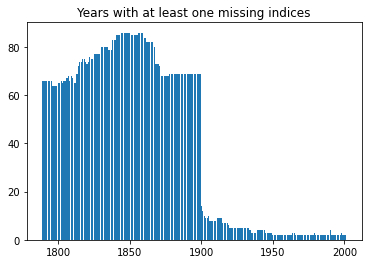

In [ ]:
import matplotlib.pyplot as plt
plt.bar(list(count["year"]), list(count["count"]))
plt.title("Years with at least one missing indices")

This confirms that most of the missing data occurs before 1900 where a lot of things are hard to trace.

Dropping all n/a values,

In [ ]:
clean.dropna(axis=0,inplace=True)

/tmp/ipykernel_106/1229517048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean.dropna(axis=0,inplace=True)


Let's try to plot a line chart of the panel data of just the electoral democracy in all countries over the last century

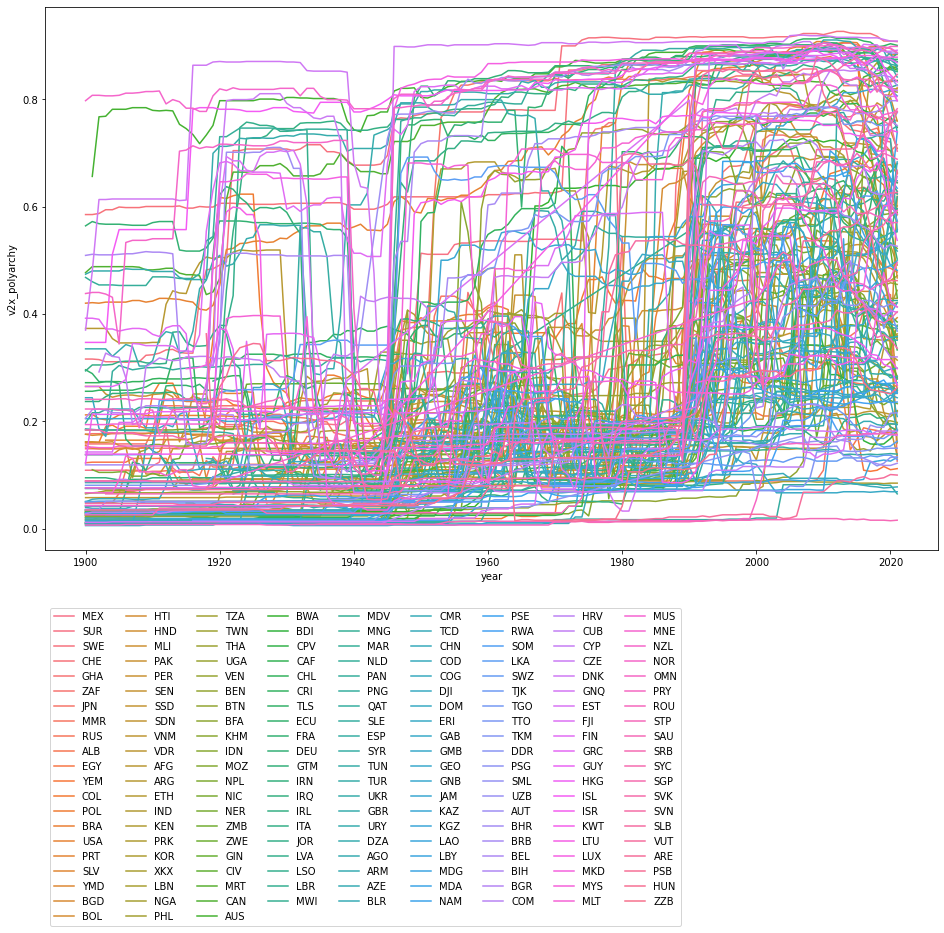

In [ ]:
import seaborn as sns
plt.figure(figsize = (16,10))
sns.lineplot(x="year",y="v2x_polyarchy",data=clean,hue="country_text_id")
plt.legend(loc="lower left", bbox_to_anchor=(0, -0.7), ncol=len(clean.columns))

One would realize that the line chart above is not very useful. There are so many lines with so many countries intertwined together, but one could infer at least the two following facts: (1) There are a lot of changes in the level of electoral democracy for all countries over the past century, this could be known by the large fluctuations of all the lines (2) Most lines are on the low side in 1900, but now there are large variations between the scores of all countries today, a bunch of them close to one, a few of them close to zero, and most lying in the middle

It would perhaps give us a bigger picutre if we compute the world averages of all five indicators

In [ ]:
clean

,country_name,country_text_id,country_id,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem
111,Mexico,MEX,3,1900,0.109,0.059,0.097,0.034,0.026
112,Mexico,MEX,3,1901,0.109,0.059,0.097,0.034,0.026
113,Mexico,MEX,3,1902,0.109,0.059,0.097,0.034,0.026
114,Mexico,MEX,3,1903,0.109,0.059,0.097,0.034,0.026
115,Mexico,MEX,3,1904,0.109,0.059,0.097,0.034,0.026
...,...,...,...,...,...,...,...,...,...
25976,Zanzibar,ZZB,236,2017,0.259,0.201,0.146,0.185,0.227
25977,Zanzibar,ZZB,236,2018,0.257,0.203,0.149,0.206,0.225
25978,Zanzibar,ZZB,236,2019,0.254,0.187,0.140,0.181,0.217
25979,Zanzibar,ZZB,236,2020,0.251,0.186,0.133,0.239,0.224


In [ ]:
avg=pd.DataFrame(clean.groupby("year").agg({"v2x_polyarchy":["sum","count"],"v2x_libdem":["sum","count"],"v2x_partipdem":["sum","count"],"v2x_delibdem":["sum","count"],"v2x_egaldem":["sum","count"]}))
avg["polyavg"]=avg[('v2x_polyarchy',   'sum')]/avg[('v2x_polyarchy', 'count')]
avg["libavg"]=avg[('v2x_libdem',   'sum')]/avg[('v2x_libdem', 'count')]
avg["partipavg"]=avg[('v2x_partipdem',   'sum')]/avg[('v2x_partipdem', 'count')]
avg["delibavg"]=avg[('v2x_delibdem',   'sum')]/avg[('v2x_delibdem', 'count')]
avg["egalavg"]=avg[('v2x_egaldem',   'sum')]/avg[('v2x_egaldem', 'count')]
avg=avg[["polyavg","libavg","partipavg","delibavg","egalavg"]]
avg


,polyavg,libavg,partipavg,delibavg,egalavg
,,,,,
year,,,,,
1900,0.142236,0.131618,0.084045,0.096264,0.088764
1901,0.148991,0.136509,0.088321,0.101491,0.092321
1902,0.150217,0.137748,0.090113,0.102852,0.093061
1903,0.149193,0.136403,0.089655,0.101655,0.092118
1904,0.149893,0.136736,0.089653,0.101281,0.092504
...,...,...,...,...,...
2017,0.522229,0.406771,0.337056,0.405872,0.394603
2018,0.521263,0.405598,0.337553,0.403330,0.392564


In [ ]:
avg.index.name = 'year'
avg.reset_index(inplace=True)

In [ ]:
avg

,year,polyavg,libavg,partipavg,delibavg,egalavg
,,,,,,
0,1900,0.142236,0.131618,0.084045,0.096264,0.088764
1,1901,0.148991,0.136509,0.088321,0.101491,0.092321
2,1902,0.150217,0.137748,0.090113,0.102852,0.093061
3,1903,0.149193,0.136403,0.089655,0.101655,0.092118
4,1904,0.149893,0.136736,0.089653,0.101281,0.092504
...,...,...,...,...,...,...
117,2017,0.522229,0.406771,0.337056,0.405872,0.394603
118,2018,0.521263,0.405598,0.337553,0.403330,0.392564
119,2019,0.518944,0.404598,0.335201,0.401665,0.390827


Text(0.5, 1.0, 'World average of the five key democracy indices from 1900 to 2020')

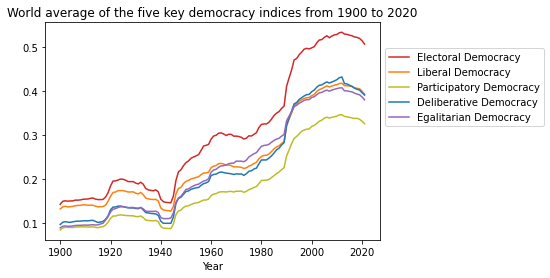

In [ ]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.plot(avg["year"],avg["polyavg"], color=color,label="Electoral Democracy")
color = 'tab:orange'
ax1.plot(avg["year"],avg["libavg"], color=color,label="Liberal Democracy")
color = 'tab:olive'
ax1.plot(avg["year"],avg["partipavg"], color=color,label="Participatory Democracy")
color = 'tab:blue'
ax1.plot(avg["year"],avg["delibavg"], color=color,label="Deliberative Democracy")
color = 'tab:purple'
ax1.plot(avg["year"],avg["egalavg"], color=color,label="Egalitarian Democracy")
ax1.legend(loc="lower left", bbox_to_anchor=(1,0.5))
plt.title("World average of the five key democracy indices from 1900 to 2020")



 


The electoral democracy score is the highest among all five types of democracy. All types of democracy see a marked increase after WWII and at around the 1990s. However, all types of democracy started dropping for the past few years at around 2018. 

In [ ]:
current=clean[clean["year"]==2021]
current["total_average"]=round((current["v2x_polyarchy"]+current["v2x_libdem"]+current["v2x_partipdem"]+current["v2x_delibdem"]+current["v2x_egaldem"])/5,3)
current

/tmp/ipykernel_106/198427826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current["total_average"]=round((current["v2x_polyarchy"]+current["v2x_libdem"]+current["v2x_partipdem"]+current["v2x_delibdem"]+current["v2x_egaldem"])/5,3)


,country_name,country_text_id,country_id,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,total_average
232,Mexico,MEX,3,2021,0.628,0.387,0.381,0.379,0.345,0.424
354,Suriname,SUR,4,2021,0.760,0.648,0.484,0.598,0.564,0.611
587,Sweden,SWE,5,2021,0.907,0.878,0.654,0.842,0.829,0.822
811,Switzerland,CHE,6,2021,0.885,0.836,0.786,0.846,0.822,0.835
931,Ghana,GHA,7,2021,0.663,0.568,0.342,0.525,0.496,0.519
...,...,...,...,...,...,...,...,...,...,...
25377,Solomon Islands,SLB,203,2021,0.626,0.473,0.368,0.371,0.349,0.437
25499,Vanuatu,VUT,206,2021,0.777,0.658,0.474,0.607,0.591,0.621
25550,United Arab Emirates,ARE,207,2021,0.100,0.081,0.031,0.087,0.135,0.087
25814,Hungary,HUN,210,2021,0.462,0.362,0.306,0.226,0.335,0.338


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = current['country_text_id'],
    z = current['total_average'],
    text = current['country_name'],
    colorscale = 'Inferno',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Years',
))
fig.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={
        'text': '<b>Mean of five core democracy indices for all countries, 2021</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    font=dict(
        family='Heebo', 
        size=18, 
        color='#525252'
    ),
    
)
    
            
fig.show
fig.show()


We see the mean democracy scores tend to be higher in North America, Europe, and Australia, while they tend to be lower in Africa, Middle East, and Asia.

## Polity5: Regime Authority Characteristics and Transitions Datasets

Revolves around the concept of "regime". Contains a polity-case version (which only documents crucial changes of regime) and a time-series version. It has much fewer variables (mostly just involves the "polity score" to show the extent of autocracy/democracy of a regime). This makes it much easier to use as the whole story is summed up by a single number, but this is also its weakness as this score is aggregated only by political factors. It lacks a more comprehensive view of democracy with economic factors as demonstrated in V-dem.

In [ ]:
!pip install xlrd
poli=pd.read_excel("data/Polity 5 Series.xls")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 4.7 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
p_avg=pd.DataFrame(poli.groupby("year").agg({"polity":["sum","count"]}))
p_avg.index.name = 'year'
p_avg.reset_index(inplace=True)
p_avg["average"]=round(p_avg[('polity', 'sum')]/p_avg[('polity', 'count')],3)
p_avg=p_avg[p_avg["year"]>=1900]

In [ ]:
p_avg

year polity       average
             sum count        
124  1900    -35    54  -0.648
125  1901   -111    55  -2.018
126  1902   -108    56  -1.929
127  1903   -111    56  -1.982
128  1904   -117    56  -2.089
..    ...    ...   ...     ...
240  2016    299   167   1.790
241  2017    389   167   2.329
242  2018    386   167   2.311
243  2019      7     1   7.000
244  2020      5     1   5.000

[121 rows x 4 columns]

Text(0.5, 1.0, 'World average of polity score, 1900-2020')

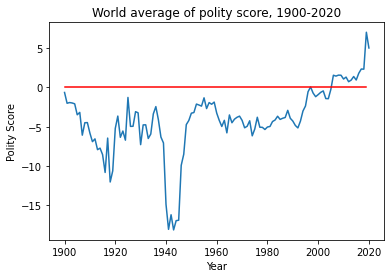

In [ ]:
plt.plot(p_avg["year"],p_avg["average"])
plt.xlabel("Year")
plt.ylabel("Polity Score")
x=np.arange(1900,2020)
y=np.zeros(120)
plt.plot(x,y,color="r")
plt.title("World average of polity score, 1900-2020")




We see a similar trend which is also seen in V-dem where the democracy score rose rapidly after the 1980s and dropped near the year 2000. The polity score stands out in one aspect in the sense that it offers a clear boundary between autocracy and democracy (<0 is autocratic and >0 is democratic). Therefore, we could draw a line at 0 on the graph, and see that world countries on average have been autocratic before year 2000. The trend then crosses the zero line at around at around 2002, so we could infer that the world has become democratic on average. It would perhaps be more meaningful/interesting if we don't treat all regimes, big or small, as equal entities. Adding population as a weighted component and calculating the % world population living under an autocratic/democratic regime would be more meaningful, but that would require historical population for every regime and some cumbersome work.  

## GWF Autocratic Regimes

In [ ]:
gwf=pd.read_excel("data/GWF All Political Regimes Case List.xls")

This is a case-based dataset revolving around autocratic regimes which may not be very practical for quantitative data analysis. It contains textual data on the type of the regime and the periods for each regime, but since it provides no panel data for yearly change and also no numerical data to quantify the extent of autocracy, it is very difficult to be used in data analysis. It is perhaps more well-suited for qualitative investigations/academia.

In [ ]:
gwf=gwf.iloc[:,0:5]
gwf=gwf.dropna(how="all")
gwf["Regime type"] = gwf["Regime type"].str.strip()
gwf=gwf.drop(gwf[gwf["Regime type"] == ""].index)
gwf

,Case Name,Country,beg yr,end yr,Regime type
0,Afghanistan 29-73,Afghanistan,1930.0,1973,monarchy
1,Afghanistan 73-78,Afghanistan,1974.0,1978,personal
2,Afghanistan 78-92,Afghanistan,1979.0,1992,sppersonal
3,Afghanistan 92-96,Afghanistan,1993.0,1996,warlord
4,Afghanistan 96-01,Afghanistan,1997.0,2001,sparty
...,...,...,...,...,...
481,Zambia 67-91,Zambia,1968.0,1991,sparty
482,Zambia 91-96,Zambia,1992.0,1996,democracy
483,Zambia 96-NA,Zambia,1997.0,NaN,sparty
484,Zimbabwe 65-80,Zimbabwe,1966.0,1980,not-independent


/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'monarchy'),
  Text(1, 0, 'personal'),
  Text(2, 0, 'sppersonal'),
  Text(3, 0, 'warlord'),
  Text(4, 0, 'sparty'),
  Text(5, 0, 'foreign-occupied'),
  Text(6, 0, 'democracy'),
  Text(7, 0, 'spmilitary'),
  Text(8, 0, 'military'),
  Text(9, 0, 'indirect military'),
  Text(10, 0, 'provisional'),
  Text(11, 0, 'oligarchy'),
  Text(12, 0, 'milpersonal'),
  Text(13, 0, 'walord'),
  Text(14, 0, 'tthreat'),
  Text(15, 0, 'warlord/foreign-occupied'),
  Text(16, 0, 'not-independent')])

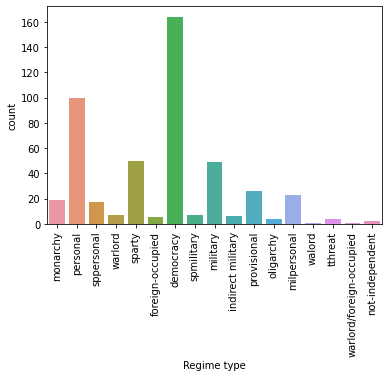

In [ ]:
sns.countplot("Regime type",data=gwf)
plt.xticks(rotation=90)


We see that throughout the annals of history, the regime type of the greatest number is still democratic states. However, there are also many personalist regimes, as well as single party and military regimes.

## Lexicial Index of Electoral Democracy

I used that latest version I found, v6.2, instead of the older version v5.2 that Ms Philo Wang gave.

In [ ]:
!pip install openpyxl
lied=pd.read_excel("data/LIED_6.4.xlsx")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 26.0 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Like "V-dem", the LIED dataset provides a series of numerical variables which the researchers deem as conditions to democracy. The variables are then used to calculate the lexical index. However, unlike the previously seen metrics, the index calculated is not a continuous variable to show the extent of democracy, but a categorical variable to show the type of regime (similar to GWF in this sense). The project also recognizes the similar work that is done by "V-dem" and "correlates of war". The data includes the country ids of the countries as they are listed in these two datasets. This would facilitate merging of the datasets, which would help if someone wants to analyze this dataset in combination with "V-dem" or "correlates of war".

In [ ]:
lied

,countryn,cow,vdem,year,male_suffrage,female_suffrage,executive_elections,legislative_elections,multi-party_legislative_elections,competitive_elections,...,political_liberties,lexical_index_plus,democratic_transition,transition_type,democratic_breakdown,breakdown_type,turnover_period,turnover_event,two_turnover_period,sovereign
0,United States,2,20.0,1789,0,0,1,1,1,1,...,0,4,1,3,0,0,0,0,0,1
1,United States,2,20.0,1790,0,0,1,1,1,1,...,0,4,0,0,0,0,0,0,0,1
2,United States,2,20.0,1791,0,0,1,1,1,1,...,0,4,0,0,0,0,0,0,0,1
3,United States,2,20.0,1792,0,0,1,1,1,1,...,0,4,0,0,0,0,0,0,0,1
4,United States,2,20.0,1793,0,0,1,1,1,1,...,0,4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32289,Samoa,990,194.0,2017,1,1,1,1,1,1,...,1,7,0,0,0,0,1,0,1,1
32290,Samoa,990,194.0,2018,1,1,1,1,1,1,...,1,7,0,0,0,0,1,0,1,1
32291,Samoa,990,194.0,2019,1,1,1,1,1,1,...,1,7,0,0,0,0,1,0,1,1
32292,Samoa,990,194.0,2020,1,1,1,1,1,1,...,1,7,0,0,0,0,1,0,1,1


In [ ]:
lied.shape

(32294, 21)

In [ ]:
lied=lied[lied["year"]>=1900]

In [ ]:
np.max(lied["year"])

2021

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Lexicial Index of Electoral Democracy, 1900-2021')

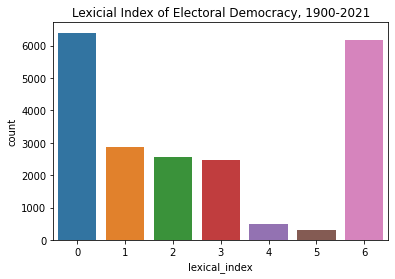

In [ ]:
sns.countplot("lexical_index",data=lied)
plt.title("Lexicial Index of Electoral Democracy, 1900-2021")

0: legislative_election=0 & executive_elections=0 (regime type: non-electoral autocracies)

1: legislative_elections=1 or executive_elections=1 & multi-party_legislative_elections=0
  (regime type: one-party autocracies, few cases where executive elections are on track but
 there is no functioning elected parliament)

2: legislative_elections=1 & multi-party_legislative_elections=1 & executive_elections=0                                                       (regime type: multiparty autocracies without elected executive – generally because a monarch
influences government appointment and removal or foreign powers dominate political
decision-making or has significant veto powers)
 

3: legislative_elections=1 & multi-party_legislative_elections=1 & executive_elections=1 &
competitive_elections=0 (regime type: multiparty autocracies)


 4: legislative_elections=1 & multi-party_legislative_elections=1 & executive_elections=1 &
 competitive_elections=1 & male_suffrage=0 (regime type: exclusive democracies)


 5: legislative_elections=1 & multi-party_legislative_elections=1 & executive_elections=1 &
 competitive_elections=1 & male_suffrage=1 & female_suffrage=0 (regime type: male
 democracies)

6: legislative_elections=1 & multi-party_legislative_elections=1 & executive_elections=1 &
 competitive_elections=1 & male_suffrage=1 & female_suffrage=1 (regime type: electoral
democracies)

While we may develop the impression that there are more democracries than expected from the GWF dataset, this classification by the LIED dataset shows that there are clearly more autocratic states than democratic states in the last century. If we consider the variations of autocracies (type 1,2,3), the difference is even bigger. This agrees with the Polity5 dataset, in which we know that the world has been predominately autocratic until the last two decades.

## Boix-Miller-Rosato Dichotomous Coding of Democracy

In [ ]:
bmr=pd.read_csv("data/democracy-v4.0.csv")

In [ ]:
bmr

,country,ccode,abbreviation,abbreviation_undp,year,democracy,democracy_trans,democracy_breakdowns,democracy_duration,democracy_omitteddata,democracy_femalesuffrage
0,UNITED STATES OF AMERICA,2,USA,USA,1800,1.0,0.0,0.0,1.0,1.0,0.0
1,UNITED STATES OF AMERICA,2,USA,USA,1801,1.0,0.0,0.0,2.0,1.0,0.0
2,UNITED STATES OF AMERICA,2,USA,USA,1802,1.0,0.0,0.0,3.0,1.0,0.0
3,UNITED STATES OF AMERICA,2,USA,USA,1803,1.0,0.0,0.0,4.0,1.0,0.0
4,UNITED STATES OF AMERICA,2,USA,USA,1804,1.0,0.0,0.0,5.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19770,SAMOA (WESTERN),990,WSM,WSM,2016,0.0,0.0,0.0,55.0,0.0,0.0
19771,SAMOA (WESTERN),990,WSM,WSM,2017,0.0,0.0,0.0,56.0,0.0,0.0
19772,SAMOA (WESTERN),990,WSM,WSM,2018,0.0,0.0,0.0,57.0,0.0,0.0
19773,SAMOA (WESTERN),990,WSM,WSM,2019,0.0,0.0,0.0,58.0,0.0,0.0


Instead of categorical and continuous variables as we see in previous dataset which attempted to classify or quantify democracy, this dataset showed democracy as a boolean variable (True/False), hence its name "dichotomous coding". The authors code a country as democratic if it meets the basic requirements of contestation and participation. This offers a very clear binary classification, but this approach may be questionable. Democracy is not always a clear-cut concept. A democratic regime could become more autocratic and vice versa, in some aspects but not others. It would be difficult to capture a comprehensive picture with a simple Yes/No. However, the paper's authors criticized the methodology of numerical variables as well, as the indices in other datasets rarely give reasons as to how they are aggregated/why the formula is set that way.

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Autocratic and democratic regime count, 1900-2020')

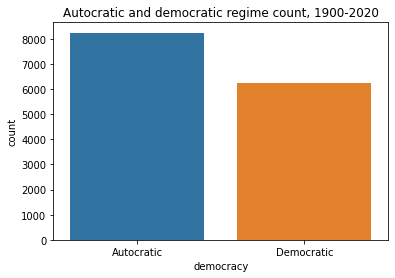

In [ ]:
bmr=bmr[bmr["year"]>=1900]
fig,ax=plt.subplots()
sns.countplot(bmr["democracy"],ax=ax)
ax.set_xticklabels(["Autocratic","Democratic"])
plt.title("Autocratic and democratic regime count, 1900-2020")


In [ ]:
bmr

,country,ccode,abbreviation,abbreviation_undp,year,democracy,democracy_trans,democracy_breakdowns,democracy_duration,democracy_omitteddata,democracy_femalesuffrage
100,UNITED STATES OF AMERICA,2,USA,USA,1900,1.0,0.0,0.0,101.0,1.0,0.0
101,UNITED STATES OF AMERICA,2,USA,USA,1901,1.0,0.0,0.0,102.0,1.0,0.0
102,UNITED STATES OF AMERICA,2,USA,USA,1902,1.0,0.0,0.0,103.0,1.0,0.0
103,UNITED STATES OF AMERICA,2,USA,USA,1903,1.0,0.0,0.0,104.0,1.0,0.0
104,UNITED STATES OF AMERICA,2,USA,USA,1904,1.0,0.0,0.0,105.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19770,SAMOA (WESTERN),990,WSM,WSM,2016,0.0,0.0,0.0,55.0,0.0,0.0
19771,SAMOA (WESTERN),990,WSM,WSM,2017,0.0,0.0,0.0,56.0,0.0,0.0
19772,SAMOA (WESTERN),990,WSM,WSM,2018,0.0,0.0,0.0,57.0,0.0,0.0
19773,SAMOA (WESTERN),990,WSM,WSM,2019,0.0,0.0,0.0,58.0,0.0,0.0


In [ ]:
table=bmr.groupby(['year', 'democracy']).size().reset_index().pivot(columns='democracy', index='year')
table.columns=["Autocratic","Democratic"]
table

,Autocratic,Democratic
year,,
1900,43,12
1901,42,14
1902,43,14
1903,44,13
1904,44,13
...,...,...
2016,77,118
2017,78,117
2018,78,117


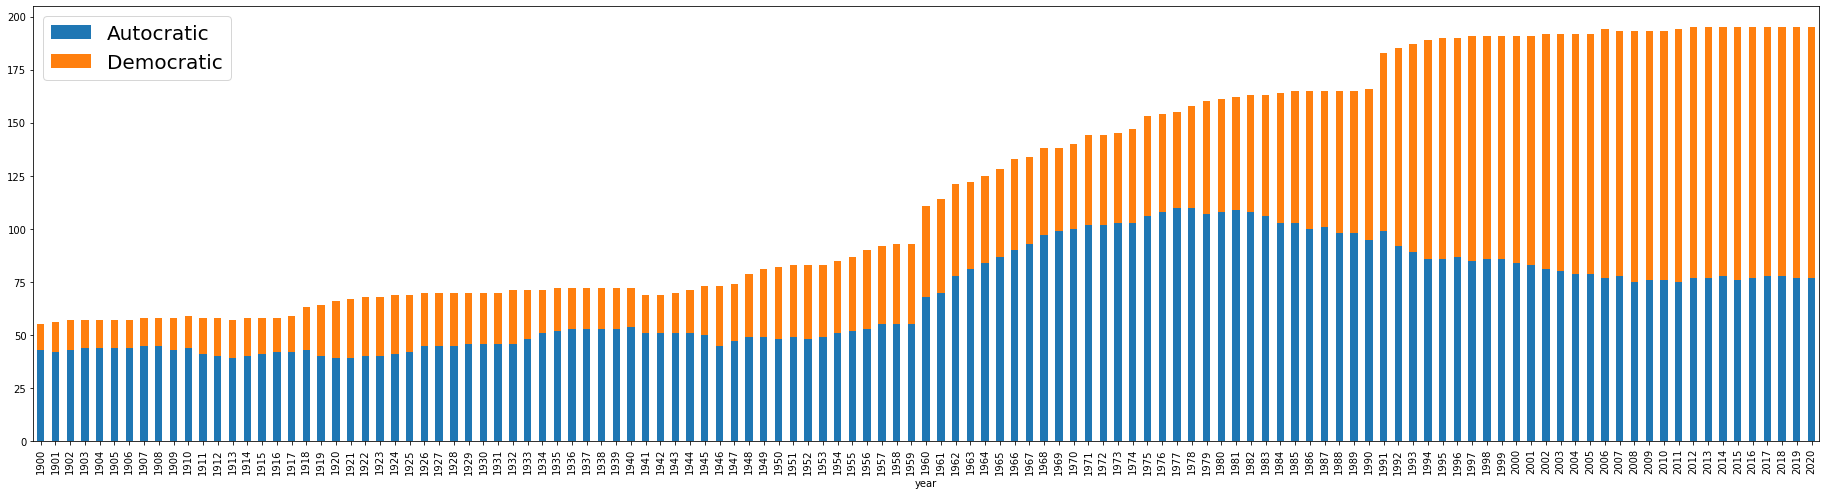

In [ ]:
table.plot(kind='bar', stacked=True,figsize=(32,8))
plt.xticks(rotation=90)
plt.legend(fontsize=20)

The dichotomous nature of the dataset has allowed us to plot a stacked bar chart such as the one above to show a new perspective on the historical trend of democracies. Democratic states are at the beginning of emergence in the 1900, only taking up a small proportion. There is a rise of autocratic states around the cold war period. Now, democratic states take the majority. This dataset, however, is unable to show the recent drop of democracy in the last few years, as we have concluded from the previous datasets. This may be because of its methodology as previously mentioned. Since its focus is on the de jure political system that only has to fulfill its structural criteria to be considered "democratic", the dataset would not be able to capture a subtle decline of democracy in certain aspects. 

## Freedom House

Similar to V-dem, freedom house provides ratings in a series of aspects such as electoral process, pluralism and participation, freedom of expression and belief, etc. There are also summary ratings for political rights and civil liberties, and the final judgment of whether a country is free or not (which is curious, as it basically drew an equal sign between the concepts of democracy and freedom, which some may argue to be false). The dataset is a lot simpler than V-dem so it is easy to use, but this could also be its disadvantage. Since there are no lower level indicators as seen in V-dem, one may  argue that the ratings are arbitrarily determined and the decision process for the ratings lacks transparency. 

In [ ]:
fh=pd.read_excel("data/All_data_FIW_2013-2022.xlsx",sheet_name=1,header=1)
fh

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
0,Abkhazia,Eurasia,t,2022,PF,5,5,2,2,1,...,1,1,4,1,1,2,1,5,23,40
1,Afghanistan,Asia,c,2022,NF,7,6,0,0,0,...,0,0,0,0,1,0,1,2,9,10
2,Albania,Europe,c,2022,PF,3,3,3,3,3,...,2,3,9,3,2,2,2,9,39,67
3,Algeria,Africa,c,2022,NF,6,5,1,1,1,...,2,2,6,2,2,2,1,7,22,32
4,Andorra,Europe,c,2022,F,1,1,4,4,4,...,4,3,15,4,4,3,4,15,55,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,West Bank,Middle East,t,2013,NF,6,5,0,0,2,...,0,1,5,1,1,2,1,5,24,30
2091,Western Sahara,Africa,t,2013,NF,7,7,0,0,0,...,0,0,0,1,1,2,0,4,7,5
2092,Yemen,Middle East,c,2013,NF,6,6,1,0,2,...,0,1,2,2,1,1,1,5,16,25
2093,Zambia,Africa,c,2013,PF,3,4,3,3,3,...,2,2,8,3,2,1,2,8,34,62


In [ ]:
np.min(fh["Edition"])

2013

In [ ]:
fh_table=fh.groupby(['Edition', 'Status']).size().reset_index().pivot(columns='Status', index='Edition')
fh_table.columns=["Free","Not Free", "Partly Free"]
fh_table


,Free,Not Free,Partly Free
Edition,,,
2013,92,54,63
2014,90,55,64
2015,91,59,60
2016,88,58,64
2017,88,57,64
2018,89,57,63
2019,87,58,64
2020,84,59,67
2021,83,64,63


Text(0.5, 1.0, 'Freedom House Country Ratings, 2013-2022')

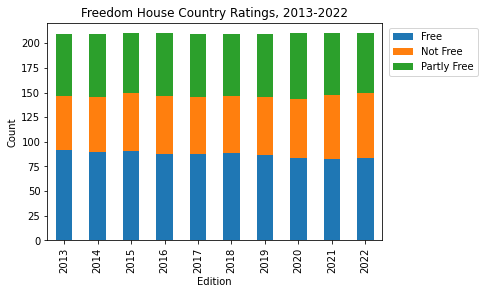

In [ ]:
fh_table.plot(kind='bar', stacked=True)
plt.legend(loc="upper right", bbox_to_anchor=(1.3,1))
plt.ylabel("Count")
plt.title("Freedom House Country Ratings, 2013-2022")



We could see that in the last few years, countries that are classified as "not free" have slightly increased while countries that are classified as "free" seem to have slightly decreased.

In [ ]:
fh_table=fh.groupby(['PR rating','CL rating','Edition']).size().reset_index().pivot(columns=['PR rating','CL rating'], index='Edition')
fh_table

0                                                  ...       \
PR rating     1               2                    3             ...    5   
CL rating     1     2    3    1     2    3    4    1    2     3  ...    4   
Edition                                                          ...        
2013       47.0  13.0  NaN  2.0  18.0  9.0  NaN  NaN  3.0  12.0  ...  9.0   
2014       49.0  10.0  NaN  1.0  21.0  7.0  1.0  NaN  2.0  15.0  ...  8.0   
2015       48.0  10.0  1.0  1.0  22.0  7.0  1.0  NaN  2.0  14.0  ...  5.0   
2016       48.0   8.0  1.0  2.0  22.0  6.0  1.0  NaN  1.0  18.0  ...  4.0   
2017       46.0  10.0  1.0  1.0  19.0  6.0  1.0  1.0  4.0  17.0  ...  5.0   
2018       45.0   8.0  1.0  2.0  21.0  7.0  1.0  1.0  4.0  19.0  ...  3.0   
2019       43.0  10.0  NaN  3.0  19.0  9.0  1.0  1.0  2.0  17.0  ...  5.0   
2020       42.0  10.0  NaN  3.0  19.0  8.0  2.0  1.0  1.0  18.0  ...  5.0   
2021       42.0   8.0  NaN  4.0  19.0  7.0  4.0  1.0  2.0  16.0  ...  6.0   
2022       41.0   9.0  NaN  4.0  20.0  7.0  2.0  1.0  2.0  15.0  ...  5.0   

                                                             
PR rating               6                     7              
CL rating     5    6    3    4     5     6    5     6     7  
Edition                                                      
2013        9.0  NaN  NaN  2.0  19.0  15.0  3.0   6.0  11.0  
2014        6.0  2.0  NaN  2.0  19.0  13.0  2.0   7.0  12.0  
2015        8.0  1.0  1.0  NaN  18.0  16.0  2.0  10.0  12.0  
2016        9.0  1.0  NaN  NaN  17.0  10.0  2.0  16.0  12.0  
2017       11.0  1.0  NaN  NaN  13.0   8.0  5.0  17.0  13.0  
2018       10.0  3.0  NaN  2.0  11.0   7.0  5.0  18.0  13.0  
2019       10.0  3.0  NaN  NaN  11.0   6.0  6.0  20.0  12.0  
2020       14.0  4.0  NaN  1.0   9.0   6.0  8.0  20.0  12.0  
2021       10.0  4.0  NaN  NaN  12.0   6.0  9.0  21.0  12.0  
2022        8.0  3.0  NaN  1.0  13.0   4.0  8.0  24.0  14.0  

[10 rows x 28 columns]

In [ ]:
fh_table=fh.groupby(['Edition']).agg({"PR rating":["mean"],"CL rating":["mean"]})
fh_table.columns=["PR rating mean","CL rating mean"]
fh_table.index.name = 'year'
fh_table.reset_index(inplace=True)
fh_table



,year,PR rating mean,CL rating mean
0,2013,3.464115,3.373206
1,2014,3.444976,3.363636
2,2015,3.480952,3.414286
3,2016,3.504762,3.419048
4,2017,3.555024,3.454545
5,2018,3.569378,3.449761
6,2019,3.598086,3.478469
7,2020,3.666667,3.519048
8,2021,3.714286,3.547619
9,2022,3.757143,3.561905


Text(0.5, 1.0, 'Political Rights and Civil Liberties Ratings, World Average, 2013-2022 \n (Lower score is more free)')

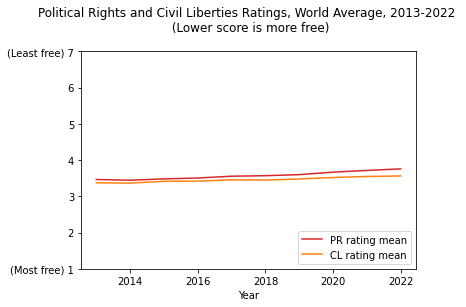

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.plot(fh_table["year"],fh_table["PR rating mean"], color=color,label="PR rating mean")
color = 'tab:orange'
ax1.plot(fh_table["year"],fh_table["CL rating mean"], color=color,label="CL rating mean")
plt.yticks(np.arange(1,8),labels=['(Most free) 1', '2', '3','4','5','6','(Least free) 7'])
locs, labels = plt.yticks()
plt.legend(loc="lower right")
plt.title("Political Rights and Civil Liberties Ratings, World Average, 2013-2022 \n (Lower score is more free)",pad=20)



We could see that the world average ratings for political rights and civil liberties have slightly increased over the years, which means the world has become less free in general. 

In [ ]:
fh_table=fh[fh["Edition"]==2022].groupby(['Region']).agg({"PR rating":["mean"],"CL rating":["mean"]})
fh_table.columns=["PR rating mean","CL rating mean"]
fh_table.index.name = 'Region'
fh_table.reset_index(inplace=True)
fh_table

,Region,PR rating mean,CL rating mean
0,Africa,4.857143,4.517857
1,Americas,2.542857,2.542857
2,Asia,3.674419,3.558140
3,Eurasia,5.944444,5.388889
4,Europe,1.674419,1.720930
5,Middle East,6.066667,5.466667


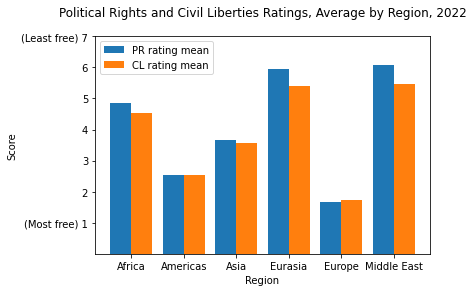

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X=fh_table["Region"]
Y=fh_table["PR rating mean"]
Z=fh_table["CL rating mean"]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'PR rating mean')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'CL rating mean')
  
plt.xticks(X_axis, X)
plt.yticks(np.arange(1,8),labels=['(Most free) 1', '2', '3','4','5','6','(Least free) 7'])
plt.xlabel("Region")
plt.ylabel("Score")

plt.title("Political Rights and Civil Liberties Ratings, Average by Region, 2022",pad=20)
plt.legend()
plt.show()

We see that Europe and the Americas, with the lowest scores, are the regions most free. Middle east and Eurasia, with the highest scores, are the regions least free. 

## Worldwide Governance Indicator

In [ ]:
wgi={}

In [ ]:
for i in range(1,7):
    df=pd.read_excel("data/wgidataset.xlsx",sheet_name=i,header=14)
    wgi[i]=df
    temp=wgi[i].iloc[:,0]
    wgi[i]=wgi[i].iloc[:,2::6]
    wgi[i]=pd.DataFrame(temp).join(wgi[i])
    wgi[i]=wgi[i].dropna()

    


More revolved around the idea of "governance" more than democracy, the World Governance Indicators offer six set of time series to judge countries' performances in six different aspects from 1996 to 2020. Though it does not provide a direct measure, the six aspects are highly related to the concept of democracy and could serve as proxy variables.

In [ ]:
wgi[1]

,Country/Territory,Estimate,Estimate.1,Estimate.2,Estimate.3,Estimate.4,Estimate.5,Estimate.6,Estimate.7,Estimate.8,...,Estimate.12,Estimate.13,Estimate.14,Estimate.15,Estimate.16,Estimate.17,Estimate.18,Estimate.19,Estimate.20,Estimate.21
1,Andorra,1.563217,1.528759,1.535655,1.437128,1.422262,1.563077,1.528182,1.329979,1.305506,...,1.360453,1.433838,1.406642,1.165939,1.194477,1.176598,1.161647,1.036913,1.110124,1.089068
2,Afghanistan,-1.908540,-2.039301,-2.031417,-1.433421,-1.177571,-1.203034,-1.125430,-1.110294,-1.057654,...,-1.335977,-1.267430,-1.240068,-1.135445,-1.117563,-1.037838,-0.990854,-1.011603,-1.006792,-1.083459
3,Angola,-1.578164,-1.411879,-1.458065,-1.238779,-1.272615,-1.285480,-1.234719,-1.252088,-1.185314,...,-1.125478,-1.076247,-1.113843,-1.145494,-1.177248,-1.139600,-1.097939,-0.906303,-0.783532,-0.810628
5,Albania,-0.648298,-0.387373,-0.285139,-0.008150,0.070308,0.007238,0.003672,0.075890,0.113008,...,0.062334,0.022064,0.048893,0.143761,0.157149,0.170927,0.203785,0.180734,0.142711,0.087340
7,United Arab Emirates,-0.409404,-0.519163,-0.516841,-0.631544,-0.912192,-0.687913,-0.708473,-0.999829,-0.906883,...,-0.896244,-1.000819,-1.019484,-1.061369,-1.112425,-1.050371,-1.096847,-1.126925,-1.140149,-1.184305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Serbia,-1.215804,-0.973843,-0.637738,0.003406,-0.120494,-0.176050,-0.206955,0.214459,0.305300,...,0.278624,0.198943,0.285488,0.212611,0.231059,0.199904,0.117220,-0.022352,-0.046223,-0.117509
210,South Africa,0.841139,0.846978,0.746240,0.659822,0.700217,0.715737,0.649010,0.651613,0.578765,...,0.590839,0.582153,0.600703,0.642118,0.650173,0.651226,0.632769,0.629004,0.643622,0.697231
211,"Congo, Dem. Rep.",-1.600949,-1.728647,-1.733551,-1.609575,-1.555048,-1.697053,-1.521638,-1.230791,-1.211481,...,-1.485156,-1.481082,-1.458554,-1.286678,-1.303906,-1.409874,-1.463378,-1.507798,-1.313627,-1.281867
212,Zambia,-0.334019,-0.483754,-0.413114,-0.317013,-0.366780,-0.444225,-0.430346,-0.207338,-0.206985,...,-0.170421,-0.132827,-0.106042,-0.109601,-0.066543,-0.299020,-0.334271,-0.342316,-0.308347,-0.430640


In [ ]:
names=['Estimate', 'Estimate.1', 'Estimate.2',
       'Estimate.3', 'Estimate.4', 'Estimate.5', 'Estimate.6', 'Estimate.7',
       'Estimate.8', 'Estimate.9', 'Estimate.10', 'Estimate.11', 'Estimate.12',
       'Estimate.13', 'Estimate.14', 'Estimate.15', 'Estimate.16',
       'Estimate.17', 'Estimate.18', 'Estimate.19', 'Estimate.20',
       'Estimate.21']

In [ ]:
wgi_df={}
for i in range(1,7):
    wgi_df[i]=pd.DataFrame(wgi[i][names].mean())
    wgi_df[i].columns=[i]

In [ ]:
for i in range(6,1,-1):
    wgi_df[i-1]=pd.merge(wgi_df[i-1],wgi_df[i], left_index=True, right_index=True)


5 6
4 5
3 4
2 3
1 2


In [ ]:
wgi_final=wgi_df[1]
wgi_final.columns=["Voice and Accountability","Political Stability","Government Effectiveness","Regulatory Quality","Rule of Law","Control of Corruption"]
wgi_final.insert(0, "Year", [1996,1998,2000,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
wgi_final

,Year,Voice and Accountability,Political Stability,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
Estimate,1996,-0.009651,3.114264e-09,-2.631999e-09,-2.038841e-10,-0.008173,-1.558845e-09
Estimate.1,1998,-0.006557,-3.698188e-09,1.751756e-02,2.341390e-02,-0.005222,2.433923e-03
Estimate.2,2000,-0.005827,-2.312224e-03,1.390823e-02,1.849391e-02,-0.013624,-2.152127e-03
Estimate.3,2002,-0.009124,2.574883e-03,3.871542e-02,3.166200e-02,-0.013185,-1.739047e-03
Estimate.4,2003,-0.010112,-5.447740e-02,4.812447e-02,3.625372e-02,-0.007187,1.093004e-02
Estimate.5,2004,-0.036160,-8.563821e-02,2.692615e-03,-9.829185e-03,-0.042872,-2.869665e-02
Estimate.6,2005,-0.042802,-8.607684e-02,-3.542725e-02,-3.262464e-02,-0.048472,-3.897446e-02
Estimate.7,2006,-0.037905,-8.302180e-02,-1.723451e-02,-1.809722e-02,-0.047370,-3.278392e-02
Estimate.8,2007,-0.040696,-8.115559e-02,-1.168978e-02,-2.433781e-03,-0.044731,-3.314169e-02
Estimate.9,2008,-0.040485,-8.996037e-02,-6.052740e-03,7.872969e-03,-0.042293,-3.112126e-02


(-0.5, 0.5)

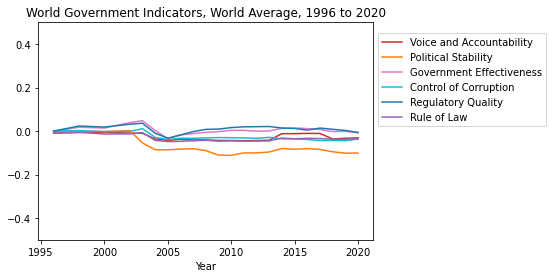

In [ ]:
fig, ax1 = plt.subplots()
["Voice and Accountability","Political Stability","Government Effectiveness","Regulatory Quality","Rule of Law","Control of Corruption"]
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.plot(wgi_final["Year"],wgi_final["Voice and Accountability"], color=color,label="Voice and Accountability")
color = 'tab:orange'
ax1.plot(wgi_final["Year"],wgi_final["Political Stability"], color=color,label="Political Stability")
color = 'tab:pink'
ax1.plot(wgi_final["Year"],wgi_final["Government Effectiveness"], color=color,label="Government Effectiveness")
color = 'tab:cyan'
ax1.plot(wgi_final["Year"],wgi_final["Control of Corruption"], color=color,label="Control of Corruption")
color = 'tab:blue'
ax1.plot(wgi_final["Year"],wgi_final["Regulatory Quality"], color=color,label="Regulatory Quality")
color = 'tab:purple'
ax1.plot(wgi_final["Year"],wgi_final["Rule of Law"], color=color,label="Rule of Law")
ax1.legend(loc="lower left", bbox_to_anchor=(1,0.5))
plt.title("World Government Indicators, World Average, 1996 to 2020")
plt.ylim([-0.5,0.5])


Over the past decade, we see the greatest drop in political stability for the world on average, while the scores for other aspects have stayed relatively flat.

Provides a list of country codes and their beginning and end dates. While this may be useful as a historical dataset to learn about changes of regimes in the past, this dataset provides no data about the autocratic/democratic nature of the regimes, and is thus not usable if the purpose is to perform analysis related to democracies.  

# Summary

The following is a summarized diagram of my interpretation of the datasets' key features

<img src="fig2.png">

# Not Analyzed

I did not analyze the following datasets that were listed. 

- ACLP/DD/PPD datasets

- Acemoglu, Naidu, Restrepo and Robinson's Dataset

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d7990f78-c082-40fd-b695-f0b8b0ca9fd3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>